In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.375.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.704.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.8597.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.5740.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.5703.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.7717.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.2618.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.1956.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.5608.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.5646.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.7267.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.5341.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.7792.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.2888.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.3808.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.838

In [4]:
import pandas as pd
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Rescaling,Input,Dense,Conv2D,MaxPooling2D,Dropout,Flatten,RandomFlip,RandomRotation,RandomTranslation,RandomZoom
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.activations import relu,sigmoid
from tensorflow.keras.models import Sequential
from io import BytesIO
from ipywidgets import widgets

2025-07-20 06:55:16.253887: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752994516.433763      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752994516.485468      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
BASE_DIR='/kaggle/input/dogs-vs-cats'
train_dir=os.path.join(BASE_DIR,'/kaggle/input/dogs-vs-cats/train')
validation_dir=os.path.join(BASE_DIR,'/kaggle/input/dogs-vs-cats/test')

train_cats_dir=os.path.join(train_dir,'cats')
train_dogs_dir=os.path.join(train_dir,'dogs')

validation_cats_dir=os.path.join(validation_dir,'cats')
validation_dogs_dir=os.path.join(validation_dir,'dogs')

In [6]:
print(f"Contents of base directory: {os.listdir(BASE_DIR)}")
print(f"\nContents of train directory: {train_dir}")
print(f"\nContents of validation directory: {validation_dir}")


Contents of base directory: ['dogs_vs_cats', 'test', 'train']

Contents of train directory: /kaggle/input/dogs-vs-cats/train

Contents of validation directory: /kaggle/input/dogs-vs-cats/test


In [7]:
train_cats_fnames=os.listdir(train_cats_dir)
train_dogs_fnames=os.listdir(train_dogs_dir)

print(f"5 files in cats subdir: {train_cats_fnames[:5]}")
print(f"5 files in dogs subdir: {train_dogs_fnames[:5]}")

5 files in cats subdir: ['cat.12461.jpg', 'cat.10176.jpg', 'cat.8194.jpg', 'cat.3498.jpg', 'cat.891.jpg']
5 files in dogs subdir: ['dog.3443.jpg', 'dog.7971.jpg', 'dog.10728.jpg', 'dog.1942.jpg', 'dog.3259.jpg']


In [8]:
print(f'Total training cat images: {len(os.listdir(train_cats_dir))}')
print(f'Total training dog images: {len(os.listdir(train_dogs_dir))}')

print(f'Total validation cat images: {len(os.listdir(validation_cats_dir))}')
print(f'Total validation dog images: {len(os.listdir(validation_dogs_dir))}')

Total training cat images: 10000
Total training dog images: 10000
Total validation cat images: 2500
Total validation dog images: 2500


for without augmentation I used 256 hidden units for dense layer and for with data augmentation i used 512 hidden units for dense layer to get the respective plot


In [43]:
model=Sequential([
    Input(shape=(150,150,3)),
    Rescaling(scale=(1./255)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [44]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     1,605,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,846,977 (7.05 MB)

 Trainable params: 1,846,977 (7.05 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
model.compile(optimizer=Adam(learning_rate=1e-4),
             metrics=['accuracy'],
              loss='binary_crossentropy'  
             )

In [49]:
train_dataset=tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(150,150),
    batch_size=32,
    label_mode='binary'
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    image_size=(150, 150),
    batch_size=32,
    label_mode='binary'
    )

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [50]:
SHUFFLE_BUFFER_SIZE=1000
PREFETCH_BUFFER_SIZE=tf.data.AUTOTUNE

train_dataset_final=train_dataset.cache().shuffle(SHUFFLE_BUFFER_SIZE).prefetch(PREFETCH_BUFFER_SIZE)
validation_dataset_final=validation_dataset.cache().prefetch(PREFETCH_BUFFER_SIZE)

In [51]:
history=model.fit(
    train_dataset_final,
    epochs=20,
    validation_data=validation_dataset_final,
    verbose=2
)

Epoch 1/20
625/625 - 25s - 40ms/step - accuracy: 0.6527 - loss: 0.6044 - val_accuracy: 0.7242 - val_loss: 0.5553
Epoch 2/20
625/625 - 8s - 13ms/step - accuracy: 0.7587 - loss: 0.4966 - val_accuracy: 0.7926 - val_loss: 0.4512
Epoch 3/20
625/625 - 8s - 13ms/step - accuracy: 0.7931 - loss: 0.4411 - val_accuracy: 0.7898 - val_loss: 0.4466
Epoch 4/20
625/625 - 8s - 13ms/step - accuracy: 0.8217 - loss: 0.3966 - val_accuracy: 0.8184 - val_loss: 0.3974
Epoch 5/20
625/625 - 8s - 13ms/step - accuracy: 0.8360 - loss: 0.3668 - val_accuracy: 0.8298 - val_loss: 0.3955
Epoch 6/20
625/625 - 8s - 13ms/step - accuracy: 0.8497 - loss: 0.3400 - val_accuracy: 0.8408 - val_loss: 0.3635
Epoch 7/20
625/625 - 8s - 13ms/step - accuracy: 0.8673 - loss: 0.3097 - val_accuracy: 0.8502 - val_loss: 0.3461
Epoch 8/20
625/625 - 8s - 13ms/step - accuracy: 0.8788 - loss: 0.2851 - val_accuracy: 0.8560 - val_loss: 0.3322
Epoch 9/20
625/625 - 8s - 13ms/step - accuracy: 0.8934 - loss: 0.2595 - val_accuracy: 0.8424 - val_loss

In [52]:

uploader = widgets.FileUpload(accept="image/*", multiple=True)
display(uploader)
out = widgets.Output()
display(out)

def file_predict(filename, file, out):
    """ A function for creating the prediction and printing the output."""
    image = tf.keras.utils.load_img(file, target_size=(150, 150))
    image = tf.keras.utils.img_to_array(image)
    image = np.expand_dims(image, axis=0)
    
    prediction = model.predict(image, verbose=0)[0][0]
    
    with out:
        if prediction > 0.5:
            print(filename + " is a dog")
        else:
            print(filename + " is a cat")


def on_upload_change(change):
    
    items = change.new
    for item in items:
        file_jpgdata = BytesIO(item.content)
        


FileUpload(value=(), accept='image/*', description='Upload', multiple=True)

Output()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


/tmp/ipykernel_36/1211776280.py:41: RuntimeWarning: invalid value encountered in divide
  x /= x.std ()
/tmp/ipykernel_36/1211776280.py:44: RuntimeWarning: invalid value encountered in cast
  x = np.clip(x, 0, 255).astype('uint8')


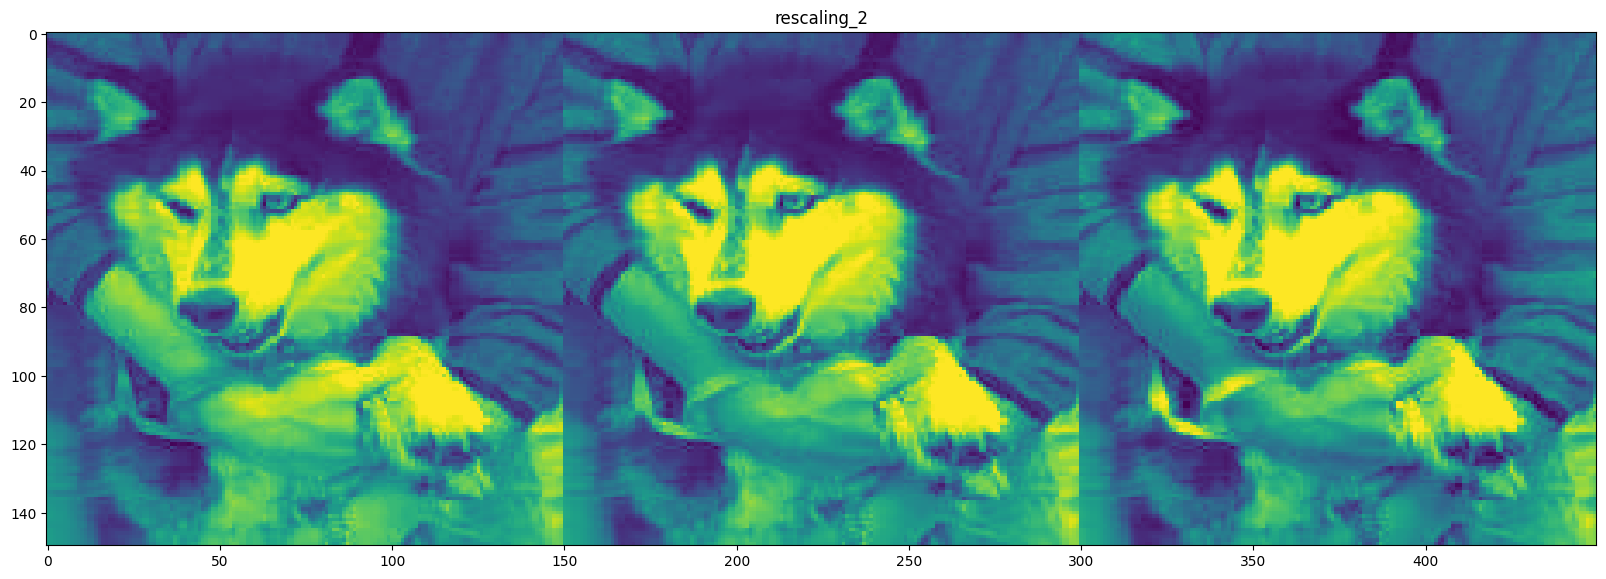

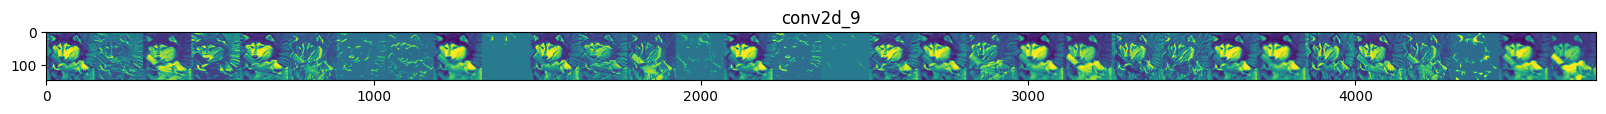

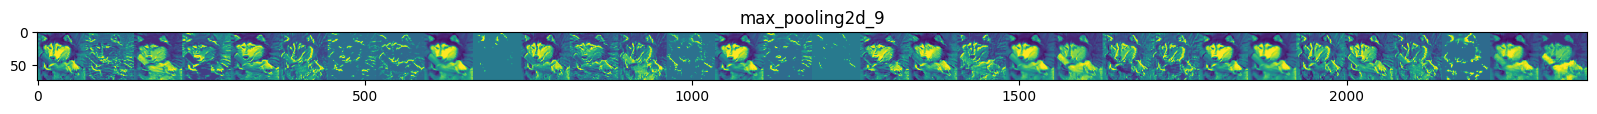

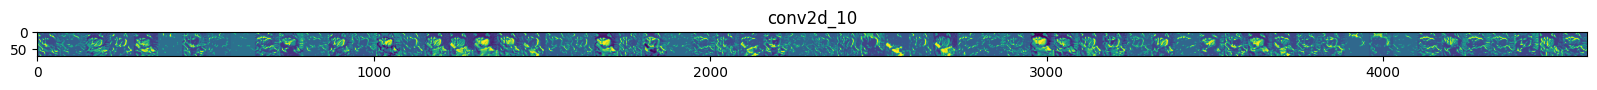

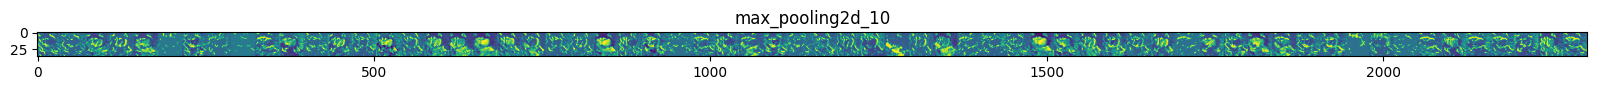

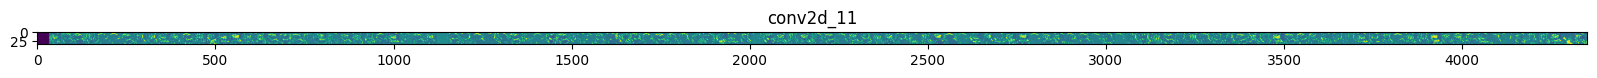

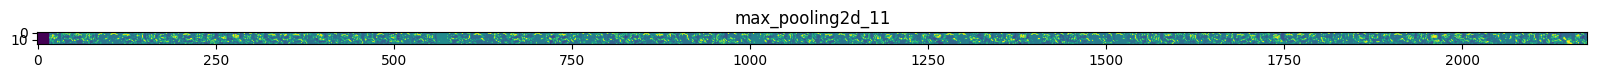

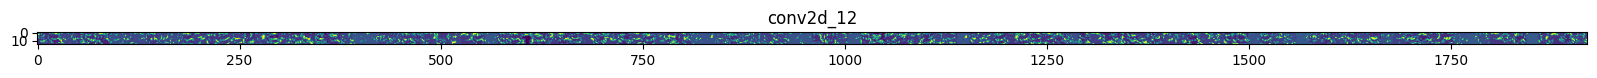

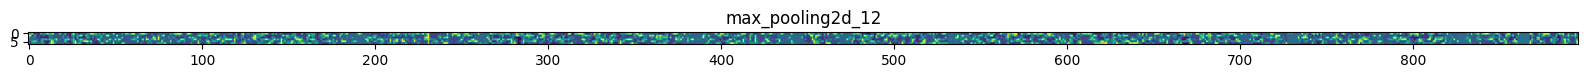

In [55]:
# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.inputs, outputs = successive_outputs)

# Prepare a random input image from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cats_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dogs_fnames]
img_path = random.choice(cat_img_files + dog_img_files)
img = tf.keras.utils.load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = tf.keras.utils.img_to_array(img) # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape) # Numpy array with shape (1, 150, 150, 3)

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):

    if len(feature_map.shape) == 4:

        #-------------------------------------------
        # Just do this for the conv / maxpool layers, not the fully-connected layers
        #-------------------------------------------
        n_features = feature_map.shape[-1]  # number of features in the feature map
        size = feature_map.shape[1]  # feature map shape (1, size, size, n_features)

        # Tile the images in this matrix
        display_grid = np.zeros((size, size * n_features))

        #-------------------------------------------------
        # Postprocess the feature to be visually palatable
        #-------------------------------------------------
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std ()
            x *=  64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

        #-----------------
        # Display the grid
        #-----------------
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

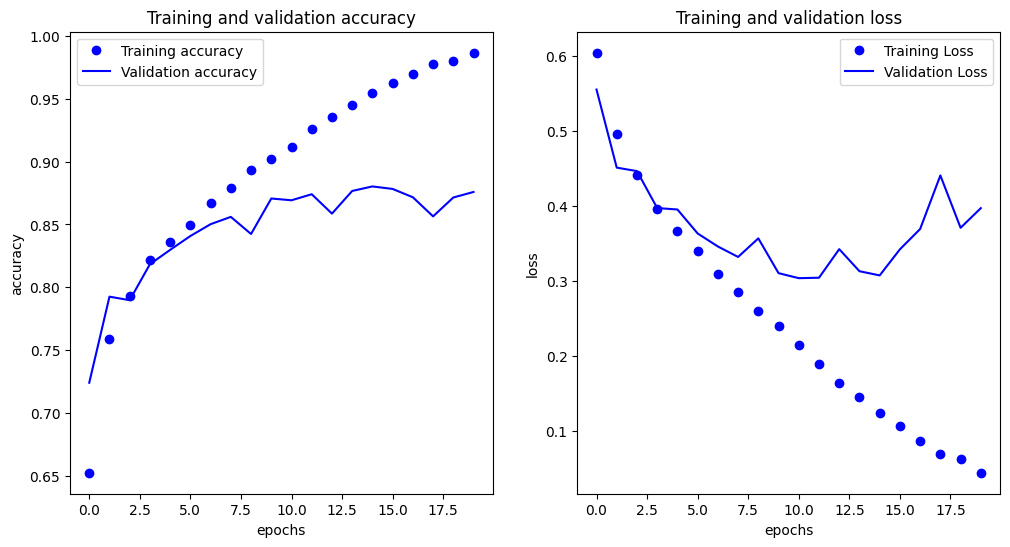

In [54]:
def plot_loss_acc(history):
    '''Plots the training and validation loss and accuracy from a history object'''
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(len(acc))
    
    fig, ax = plt.subplots(1,2, figsize=(12, 6))
    ax[0].plot(epochs, acc, 'bo', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].set_xlabel('epochs')
    ax[0].set_ylabel('accuracy')
    ax[0].legend()
    
    ax[1].plot(epochs, loss, 'bo', label='Training Loss')
    ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
    ax[1].set_title('Training and validation loss')
    ax[1].set_xlabel('epochs')
    ax[1].set_ylabel('loss')
    ax[1].legend()
    
    plt.show()

plot_loss_acc(history)

In [29]:
data_augmentation=Sequential([
    Input(shape=(150,150,3)),
    RandomFlip('horizontal'),
    RandomRotation(0.2,fill_mode='nearest'),
    RandomTranslation(0.2,0.2,fill_mode='nearest'),
    RandomZoom(0.2,fill_mode='nearest')
    
])

In [30]:
model_with_aug=Sequential([
    data_augmentation,
    model
])

In [31]:
model_with_aug.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(learning_rate=1e-4),
    metrics=['accuracy']
)

In [32]:
history_with_aug=model_with_aug.fit(
    train_dataset_final,
    epochs=80,
    validation_data=validation_dataset_final,
    verbose=2
)

Epoch 1/80
625/625 - 15s - 24ms/step - accuracy: 0.5576 - loss: 0.6809 - val_accuracy: 0.5490 - val_loss: 0.7057
Epoch 2/80
625/625 - 10s - 16ms/step - accuracy: 0.6168 - loss: 0.6477 - val_accuracy: 0.6546 - val_loss: 0.6191
Epoch 3/80
625/625 - 10s - 16ms/step - accuracy: 0.6511 - loss: 0.6243 - val_accuracy: 0.6840 - val_loss: 0.5904
Epoch 4/80
625/625 - 10s - 16ms/step - accuracy: 0.6765 - loss: 0.5985 - val_accuracy: 0.6966 - val_loss: 0.5732
Epoch 5/80
625/625 - 10s - 16ms/step - accuracy: 0.6903 - loss: 0.5808 - val_accuracy: 0.7398 - val_loss: 0.5321
Epoch 6/80
625/625 - 10s - 16ms/step - accuracy: 0.7035 - loss: 0.5702 - val_accuracy: 0.7518 - val_loss: 0.5166
Epoch 7/80
625/625 - 10s - 16ms/step - accuracy: 0.7115 - loss: 0.5583 - val_accuracy: 0.7086 - val_loss: 0.5557
Epoch 8/80
625/625 - 10s - 16ms/step - accuracy: 0.7236 - loss: 0.5420 - val_accuracy: 0.7576 - val_loss: 0.4895
Epoch 9/80
625/625 - 10s - 16ms/step - accuracy: 0.7301 - loss: 0.5368 - val_accuracy: 0.7724 - 

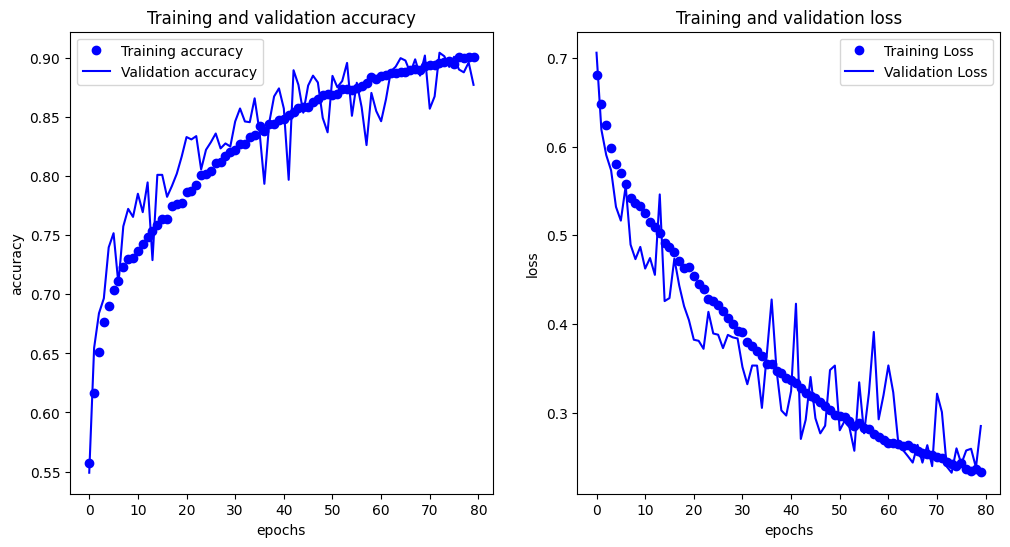

In [33]:
def plot_loss_acc(history):
    '''Plots the training and validation loss and accuracy from a history object'''
    acc = history_with_aug.history['accuracy']
    val_acc = history_with_aug.history['val_accuracy']
    loss = history_with_aug.history['loss']
    val_loss = history_with_aug.history['val_loss']
    
    epochs = range(len(acc))
    
    fig, ax = plt.subplots(1,2, figsize=(12, 6))
    ax[0].plot(epochs, acc, 'bo', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].set_xlabel('epochs')
    ax[0].set_ylabel('accuracy')
    ax[0].legend()
    
    ax[1].plot(epochs, loss, 'bo', label='Training Loss')
    ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
    ax[1].set_title('Training and validation loss')
    ax[1].set_xlabel('epochs')
    ax[1].set_ylabel('loss')
    ax[1].legend()
    
    plt.show()

plot_loss_acc(history)